<a href="https://colab.research.google.com/github/adonis119/comp3115/blob/master/COMP3115_project_Covid19_analysis_by_district.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests pandas numpy seaborn tqdm

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import folium as fol
import webbrowser

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 23

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
from time import gmtime, strftime, time
import urllib.parse

def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

In [ ]:
# acquire data through gov data API
building_list_home_confinees_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/building_list_home_confinees_eng.csv')
building_list_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/building_list_eng.csv')
home_confinees_tier2_building_list_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/home_confinees_tier2_building_list.csv')
pd.read_csv(home_confinees_tier2_building_list_urls[1]).head(20)
# pd.read_csv(building_list_urls[0])

,編號 No.,區 District,地址 Address,家居檢疫最後日期 End Date of Home Quarantine Order
0,1,中西區 Central & Western,加多近山\nCADOGAN,27/02/2020
1,2,中西區 Central & Western,"西摩道11號福澤花園A座\nBLOCK A, THE FORTUNE GARDENS, NO...",27/02/2020
2,3,中西區 Central & Western,"花園道55號愛都大廈3座\nBLOCK 3, ESTORIL COURT, NO.55 GA...",27/02/2020
3,4,中西區 Central & Western,皇后大道西355-359號\nNO.355-359 QUEEN'S ROAD WEST,27/02/2020
4,5,中西區 Central & Western,泰成大廈\nTAI SHING BUILDING,27/02/2020
5,6,中西區 Central & Western,高雲臺\nGOLDWIN HEIGHTS,27/02/2020
6,7,中西區 Central & Western,啟豐大廈\nKAI FUNG MANSION,27/02/2020
7,8,中西區 Central & Western,堅城中心\nKENNEDY TOWN CENTRE,27/02/2020
8,9,中西區 Central & Western,"第三街208號毓明閣1座\nBLOCK 1, YUK MING TOWERS, NO.208...",27/02/2020
9,10,中西區 Central & Western,德輔道西333號\nNO.333 DES VOEUX ROAD WEST,27/02/2020


In [ ]:
building_list_home_confinees_urls
building_list_urls
# clean bugged data , [6]
del home_confinees_tier2_building_list_urls[6] 

In [ ]:
# set dataframe
building_list_home_confinees_df = pd.DataFrame()
building_list_df = pd.DataFrame()
home_confinees_tier2_building_df = pd.DataFrame()

# fetch
for u in tqdm(home_confinees_tier2_building_list_urls):
    home_confinees_tier2_building_df = pd.concat([home_confinees_tier2_building_df, pd.read_csv(u,index_col=False)])

100%|██████████| 8/8 [00:18<00:00,  2.30s/it]


In [ ]:
# home_confinees_tier2_building
home_confinees_tier2_building_df.describe()

,編號 No.
count,78790.000000
mean,5312.736502
std,3431.842914
min,1.000000
25%,2463.000000
50%,4925.000000
75%,7738.000000
max,13649.000000


In [ ]:
home_confinees_tier2_building_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78790 entries, 0 to 13648
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   編號 No.                                      78790 non-null  int64 
 1   區 District                                  78790 non-null  object
 2   地址 Address                                  78790 non-null  object
 3   家居檢疫最後日期 End Date of Home Quarantine Order  78790 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# this dataset is the period of 27/02/2020 to 26/03/2020
home_confinees_tier2_building_df

,編號 No.,區 District,地址 Address,家居檢疫最後日期 End Date of Home Quarantine Order
0,1,中西區 Central & Western,加多近山\nCADOGAN,27/02/2020
1,2,中西區 Central & Western,"西摩道11號福澤花園A座\nBLOCK A, THE FORTUNE GARDENS, NO...",27/02/2020
2,3,中西區 Central & Western,"花園道55號愛都大廈3座\nBLOCK 3, ESTORIL COURT, NO.55 GA...",27/02/2020
3,4,中西區 Central & Western,皇后大道西355-359號\nNO.355-359 QUEEN'S ROAD WEST,27/02/2020
4,5,中西區 Central & Western,泰成大廈\nTAI SHING BUILDING,27/02/2020
...,...,...,...,...
13644,13645,離島 Islands,"滿東邨滿和樓\nMUN WO HOUSE, MUN TUNG ESTATE",26/03/2020
13645,13646,離島 Islands,"滿東邨滿康樓\nMUN HONG HOUSE, MUN TUNG ESTATE",26/03/2020
13646,13647,離島 Islands,"滿東邨滿順樓\nMUN SHUN HOUSE, MUN TUNG ESTATE",26/03/2020
13647,13648,離島 Islands,"藍天海岸水藍‧天岸3座\nBLOCK 3, LE BLEU DEUX, COASTAL SK...",26/03/2020


In [ ]:
home_confinees_tier2_building_df.drop(columns=['編號 No.'],inplace=True)
home_confinees_tier2_building_df.rename(columns={"區 District": "District", "地址 Address": "Address","家居檢疫最後日期 End Date of Home Quarantine Order":"End Date of Home Quarantine Order"},inplace=True)

In [ ]:
# remove Chinese 
home_confinees_tier2_building_df['District'] = home_confinees_tier2_building_df['District'].str.replace(r'[^\x00-\x7F]+', '')
# home_confinees_tier2_building_df['Address'] = home_confinees_tier2_building_df['Address'].str.replace(r'[^\x00-\x7F]+', '')

# print(home_confinees_tier2_building_df['Address'].str.partition('\n')[2]);

# clean address string
home_confinees_tier2_building_df['Address'] = home_confinees_tier2_building_df['Address'].str.partition('\n')[2]
home_confinees_tier2_building_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,District,Address,End Date of Home Quarantine Order
0,Central & Western,CADOGAN,27/02/2020
1,Central & Western,"BLOCK A, THE FORTUNE GARDENS, NO.11 SEYMOUR ROAD",27/02/2020
2,Central & Western,"BLOCK 3, ESTORIL COURT, NO.55 GARDEN ROAD",27/02/2020
3,Central & Western,NO.355-359 QUEEN'S ROAD WEST,27/02/2020
4,Central & Western,TAI SHING BUILDING,27/02/2020
...,...,...,...
13644,Islands,"MUN WO HOUSE, MUN TUNG ESTATE",26/03/2020
13645,Islands,"MUN HONG HOUSE, MUN TUNG ESTATE",26/03/2020
13646,Islands,"MUN SHUN HOUSE, MUN TUNG ESTATE",26/03/2020
13647,Islands,"BLOCK 3, LE BLEU DEUX, COASTAL SKYLINE",26/03/2020


In [ ]:
# total count of covid case
home_confinees_tier2_building_df['District'].count()

78790

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})

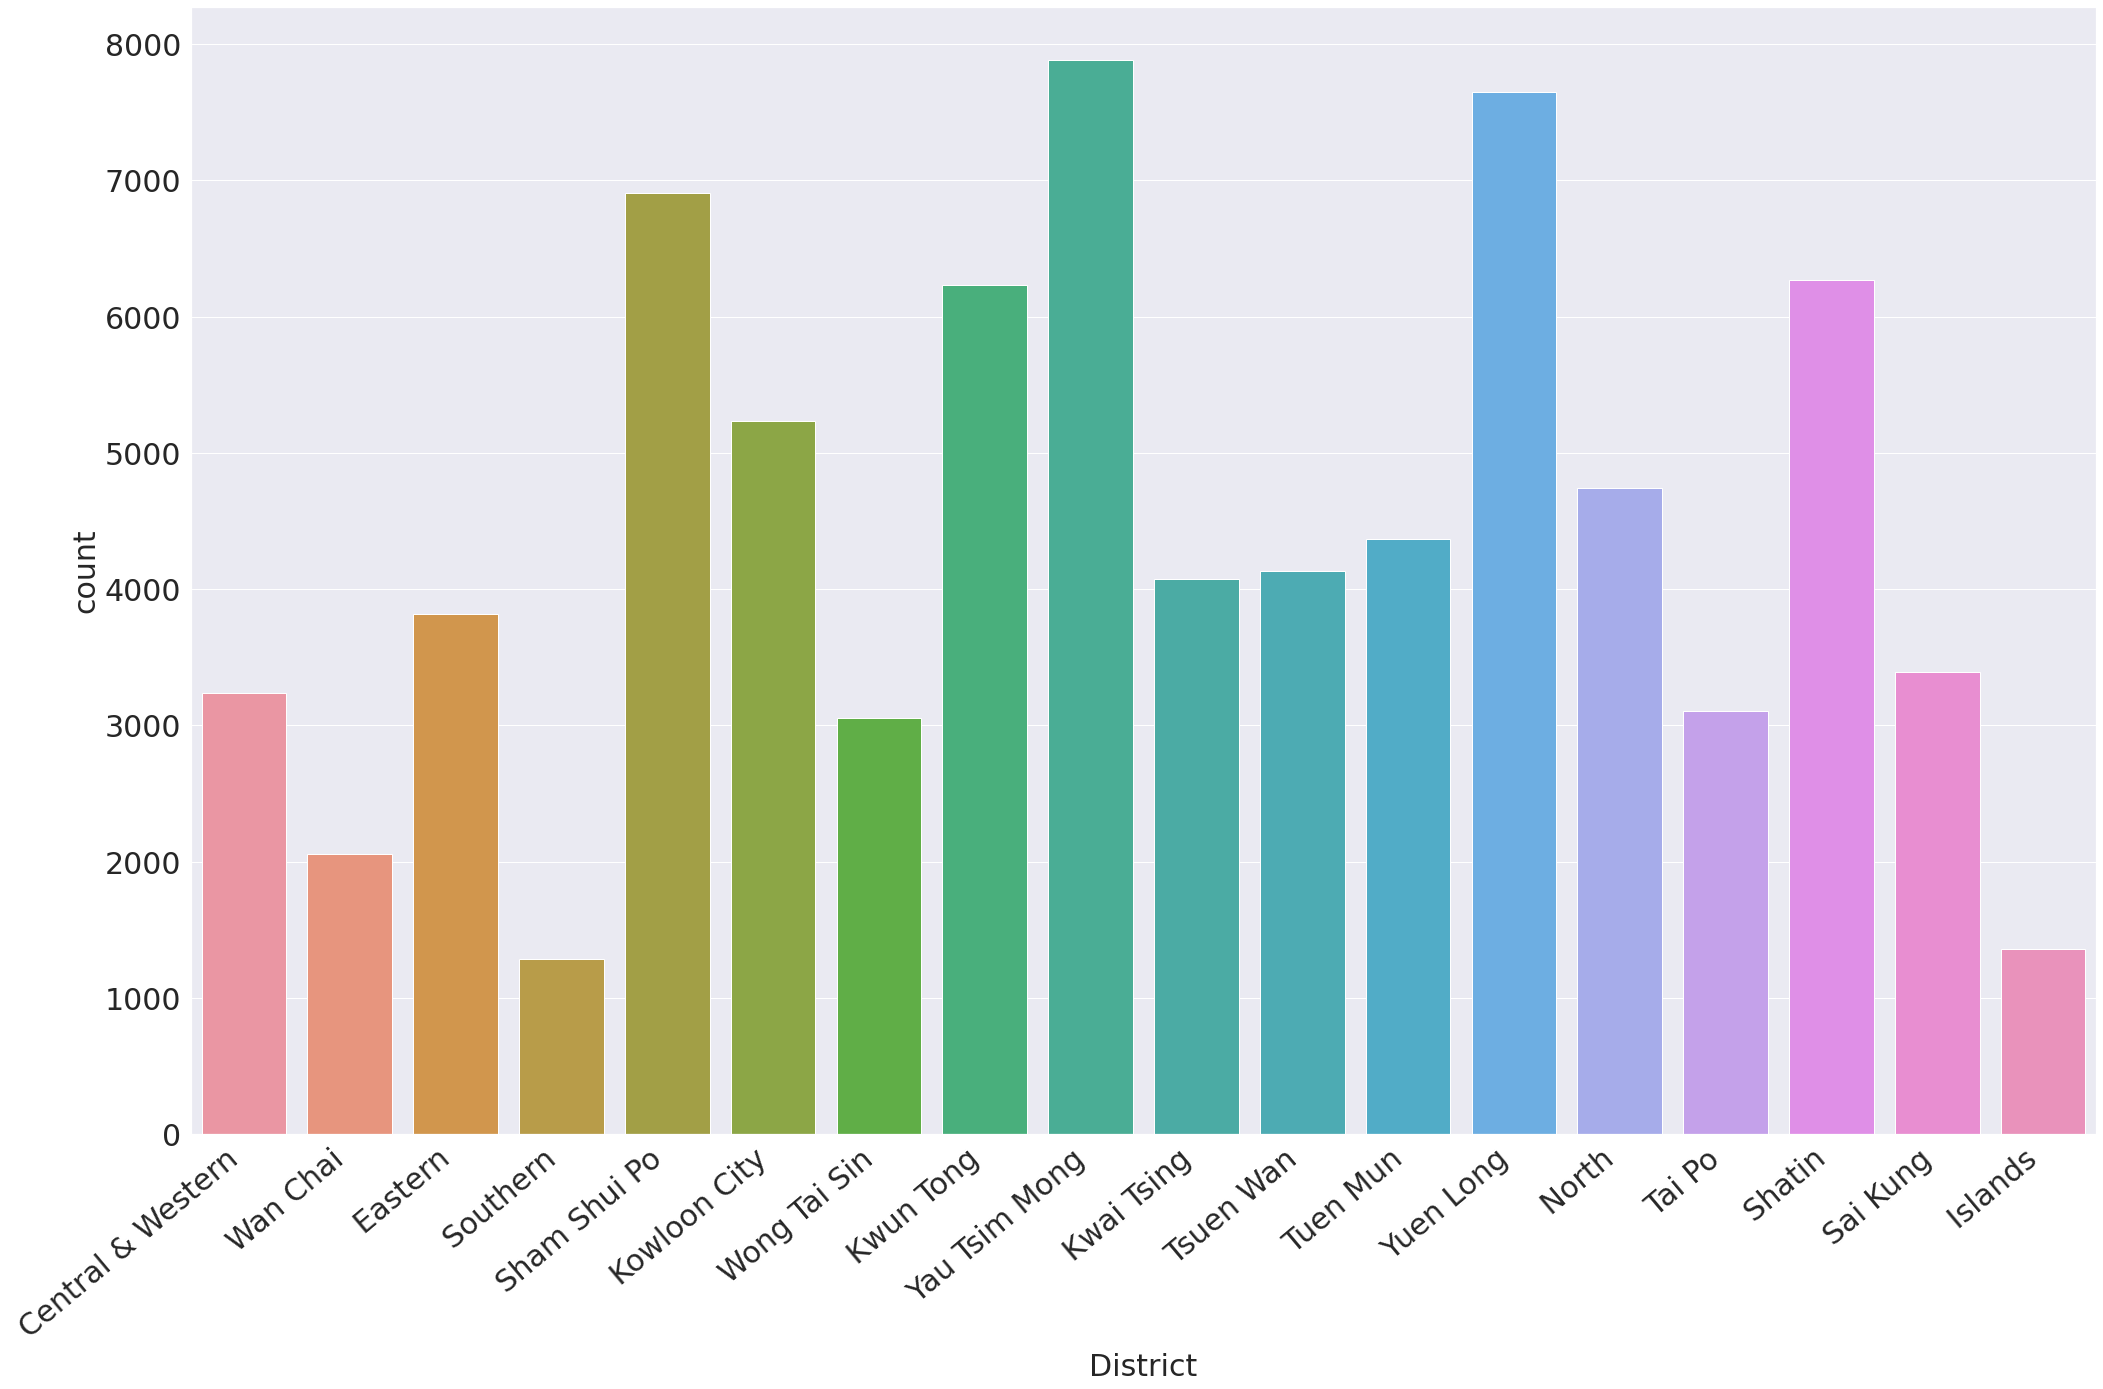

In [ ]:
ax = sns.countplot(data= home_confinees_tier2_building_df, x='District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# fig, ax = plt.subplots()

# ax.bar(x=home_confinees_tier2_building_df['District'], y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

# plt.show()

In [ ]:
home_confinees_tier2_building_df['District'].value_counts().array
dcount = pd.DataFrame(home_confinees_tier2_building_df['District'].value_counts());
dcount.rename(columns={'District':'Count'},inplace=True)
dcount['District'] = dcount.index
dcount.reset_index(inplace=True)
dcount.index += 1
dcount.drop(columns='index',inplace=True)
dcount

,Count,District
1,7881,Yau Tsim Mong
2,7650,Yuen Long
3,6906,Sham Shui Po
4,6271,Shatin
5,6231,Kwun Tong
6,5235,Kowloon City
7,4743,North
8,4369,Tuen Mun
9,4133,Tsuen Wan
10,4076,Kwai Tsing


In [ ]:
# create a percentage array from District
(100 * home_confinees_tier2_building_df['District'].value_counts() / home_confinees_tier2_building_df['District'].value_counts().sum())

 Yau Tsim Mong        10.002538
 Yuen Long             9.709354
 Sham Shui Po          8.765072
 Shatin                7.959132
 Kwun Tong             7.908364
 Kowloon City          6.644244
 North                 6.019799
 Tuen Mun              5.545120
 Tsuen Wan             5.245590
 Kwai Tsing            5.173245
 Eastern               4.840716
 Sai Kung              4.306384
 Central & Western     4.107120
 Tai Po                3.937048
 Wong Tai Sin          3.874857
 Wan Chai              2.610737
 Islands               1.721031
 Southern              1.629648
Name: District, dtype: float64

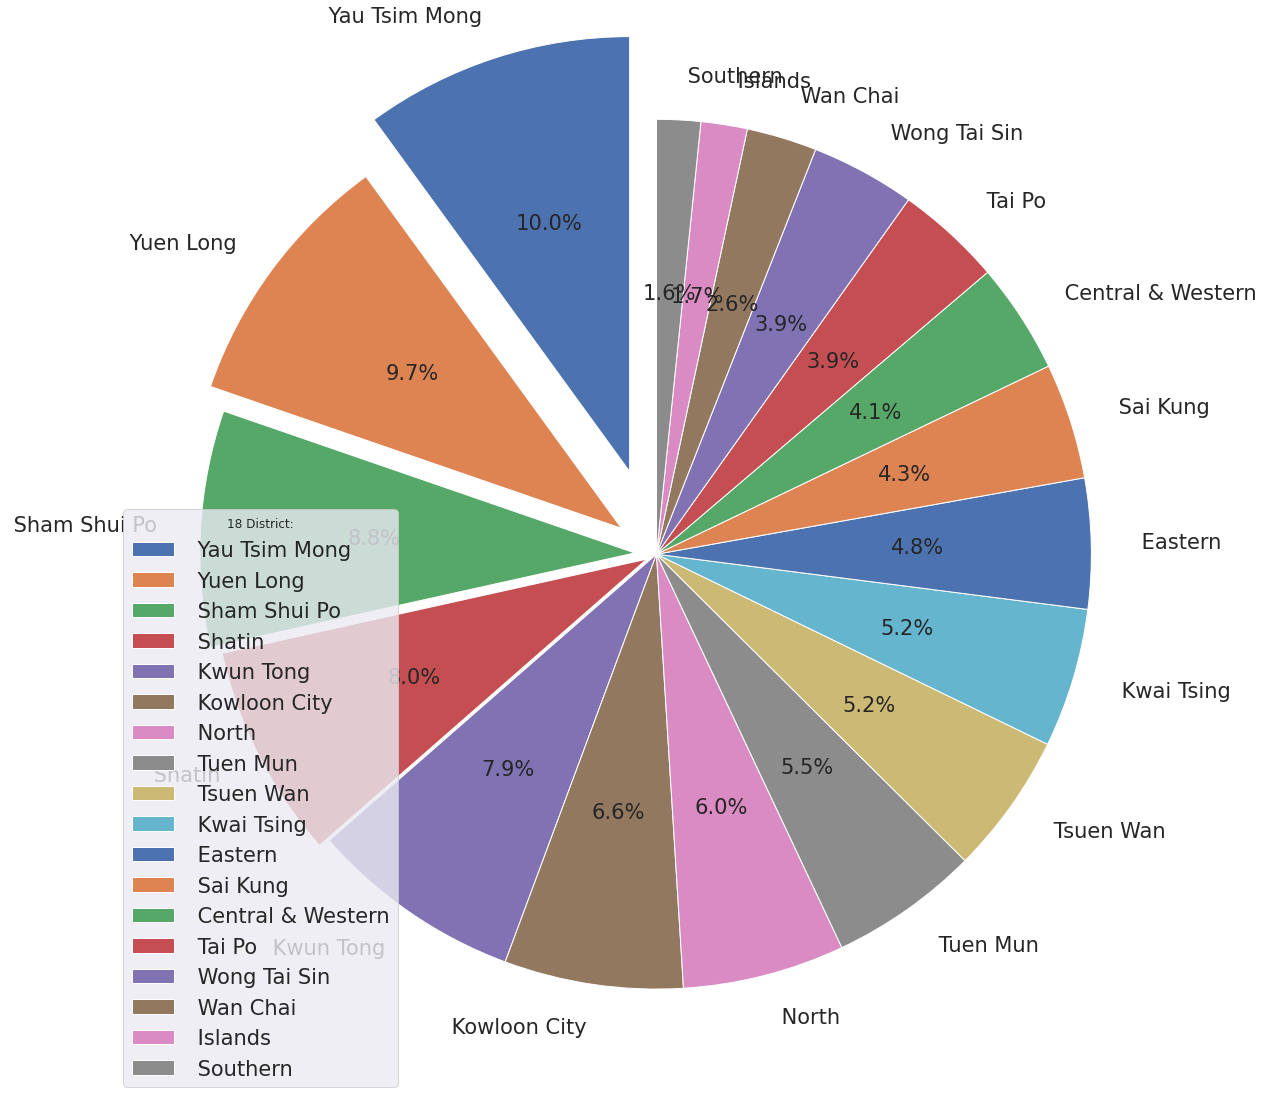

In [ ]:
import numpy as np
from matplotlib import cm
c = cm.Set1(np.arange(40)/40.)
y = (100 * home_confinees_tier2_building_df['District'].value_counts() / home_confinees_tier2_building_df['District'].value_counts().sum())
plt.pie(y.array, labels = y.index,explode=[0.2,0.1,0.05,0.025,0,0,0,0,0,0,0,0,0,0,0,0,0,0], startangle=90,autopct='%1.1f%%')
plt.legend(title="18 District:")
plt.show()


In [ ]:
#過去14天內有嚴重急性呼吸綜合症冠狀病毒2的陽性檢測個案曾到訪的大廈名單

# fetch
for u in tqdm(building_list_home_confinees_urls):
    building_list_home_confinees_df = pd.concat([building_list_home_confinees_df, pd.read_csv(u,index_col=False)])

100%|██████████| 19/19 [00:29<00:00,  1.53s/it]


In [ ]:
building_list_home_confinees_df.drop(columns="No.",inplace=True)


In [ ]:
dcount['District'].array

<PandasArray>
[    ' Yau Tsim Mong',         ' Yuen Long',      ' Sham Shui Po',
            ' Shatin',         ' Kwun Tong',      ' Kowloon City',
             ' North',          ' Tuen Mun',         ' Tsuen Wan',
        ' Kwai Tsing',           ' Eastern',          ' Sai Kung',
 ' Central & Western',            ' Tai Po',      ' Wong Tai Sin',
          ' Wan Chai',           ' Islands',          ' Southern']
Length: 18, dtype: object

In [ ]:
# https://www.had.gov.hk/psi/hong-kong-administrative-boundaries/hksar_18_district_boundary.json

In [ ]:
# fetch
del building_list_urls[698]

for u in tqdm(building_list_urls):
    building_list_df = pd.concat([building_list_df, pd.read_csv(u,index_col=False)])

100%|██████████| 761/761 [20:34<00:00,  1.62s/it]


In [ ]:
building_list_df

,District,Building name,Date of the last case staying in the building during the symptomatic phase,Related confirmed cases,Last date of residence of the case(s),Related probable/confirmed cases,Last date of visit of the case(s),Related cases
0,Shatin,Alva Hotel by Royal,20/01/2020,NaN,NaN,NaN,NaN,NaN
1,Shatin,"Tower 1A, Oceanaire",21/01/2020,NaN,NaN,NaN,NaN,NaN
2,Shatin,"Tower 1, Lake Silver",23/01/2020,NaN,NaN,NaN,NaN,NaN
3,Tuen Mun,South Hillcrest,24/01/2020,NaN,NaN,NaN,NaN,NaN
4,Eastern,Universal Towers,25/01/2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7124,Yuen Long,"Block 2, Beauty Court",NaN,NaN,NaN,NaN,NaN,NaN
7125,Yuen Long,Lai Hung Garden,NaN,NaN,NaN,NaN,NaN,NaN
7126,Yuen Long,Wong Uk Tsuen,NaN,NaN,NaN,NaN,NaN,NaN
7127,Yuen Long,Wong Nai Tun Tsuen,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# building_list_df = building_list_df.drop(columns={'Related confirmed cases','Last date of residence of the case(s)','Related probable/confirmed cases','Last date of visit of the case(s)','Related cases'})
building_list_df['District'].unique()


array(['Shatin', 'Shatin ', 'Tuen Mun', 'Eastern', 'Sai Kung',
       'Yau Tsim Mong', 'Central ', 'Kwai Tsing', 'Kowloon City',
       'Kwai Ching', 'Central', 'Kwun Tong', 'North District', 'Sha Tin',
       'Wong Tai Sin', 'Wan Chai', 'Southern District ', 'Sai Kung ',
       'Wan Chai ', 'Eastern District', 'Southern District',
       'Central and Western District ', 'Eastern ', 'North ', 'Southern',
       'Southern ', 'Central and Western ', 'Sham Shui Po', 'Yuen Long',
       'Tai Po', 'Central and Western', 'Yuen Long ', 'Kwun Tong ',
       'Yau Tsim Mong ', 'Islands', nan, 'Kowloon City\xa0',
       'Kowloon City?', 'Tsuen Wan ', 'Tsuen Wan', 'Sha Tin ',
       'Yau Tsim Mon', 'Kwai Tsing ', 'Yuen Long District', 'North',
       'Central & Western', 'Tai Hang', 'Kowloon City ',
       'Central &Western', 'Island', '8 Hysan Avenue', 'Shum Shui Po',
       'KOWLOON CITY', 'SAI KUNG', 'SHAM SHUI PO', 'WAN CHAI',
       'CENTRAL & WESTERN', 'TAI PO', 'SHA TIN', 'Kowloon CIty',
  

In [ ]:
building_list_df['District']= building_list_df['District'].str.strip()

building_list_df.drop(columns='Date of the last case staying in the building during the symptomatic phase')
x= building_list_df['District']
building_list_df2 = building_list_df.drop(building_list_df[~((x=='Yau Tsim Mong')|( x=='Yuen Long')|( x=='Sham Shui Po')| (x=='Shatin')| (x=='Kwun Tong')| (x=='Kowloon City ')| (x=='North')| (x=='Tuen Mun')| (x=='Tsuen Wan')| (x=='Kwai Tsing')| (x=='Eastern')| (x=='Sai Kung')| (x=='Central & Western')| (x=='Tai Po') | (x== 'Wong Tai Sin')| (x=='Wan Chai')| (x=='Islands')| (x=='Southern'))].index)
building_list_df2.reset_index(drop=True)


,District,Building name,Date of the last case staying in the building during the symptomatic phase,Related confirmed cases,Last date of residence of the case(s),Related probable/confirmed cases,Last date of visit of the case(s),Related cases
0,Yuen Long,Ho Sing Building,NaN,NaN,NaN,NaN,NaN,NaN
1,Yuen Long,"Block 2, Ho Shun Yee Building",NaN,NaN,NaN,NaN,NaN,NaN
2,Yuen Long,"Block A, Ho Shun Tai Building",NaN,NaN,NaN,NaN,NaN,NaN
3,Yuen Long,Ho Shun Fuk Building,NaN,NaN,NaN,NaN,NaN,NaN
4,Yuen Long,On Ga Building,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
38176,Yuen Long,"Block 2, Beauty Court",NaN,NaN,NaN,NaN,NaN,NaN
38177,Yuen Long,Lai Hung Garden,NaN,NaN,NaN,NaN,NaN,NaN
38178,Yuen Long,Wong Uk Tsuen,NaN,NaN,NaN,NaN,NaN,NaN
38179,Yuen Long,Wong Nai Tun Tsuen,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ax = sns.countplot(data= building_list_df2, x='District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
import geopandas as gpd
gdf = gpd.read_file('/content/drive/MyDrive/CHP_CAP599C_QUARANTINE_V1_March.geojson')
gdf

     |████████████████████████████████| 1.0 MB 8.8 MB/s 
     |████████████████████████████████| 6.3 MB 45.4 MB/s 
     |████████████████████████████████| 16.7 MB 45.7 MB/s 


,id,OBJECTID,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry
0,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62718,North,北區,NO.3 KA FU CLOSE,嘉富坊3號,2020-03-21,830684.0,840878.0,2020-03-14,POINT (830684.000 840878.000)
1,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62720,North,北區,"BLOCK 1, VIENNA GARDEN",維也納花園1座,2020-03-21,831478.0,839589.0,2020-03-14,POINT (831478.000 839589.000)
2,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62721,North,北區,LOK FUNG BUILDING,樂豐樓,2020-03-21,832770.0,839959.0,2020-03-14,POINT (832770.000 839959.000)
3,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62722,North,北區,NO.10 LUNG SUM AVENUE,龍琛路10號,2020-03-21,831427.0,840466.0,2020-03-14,POINT (831427.000 840466.000)
4,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62723,North,北區,LO WU STATION ROAD,羅湖道,2020-03-21,830194.0,842843.0,2020-03-14,POINT (830194.000 842843.000)
...,...,...,...,...,...,...,...,...,...,...,...
92013,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...,76926,Shatin,沙田,"BLOCK E, MOSTOWN (PHASE 4), SUNSHINE CITY",新港城(4期)E座,2020-03-14,841990.0,831696.0,2020-03-15,POINT (841990.000 831696.000)
92014,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...,77628,Sai Kung,西貢,"SHEUNG YAN HOUSE, SHEUNG TAK ESTATE",尚德邨尚仁樓,2020-03-10,844619.0,819154.0,2020-03-15,POINT (844619.000 819154.000)
92015,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...,78260,Islands,離島,"GREENVALE VILLAGE, GREENERY COURT, DISCOVERY BAY",愉景灣頤峰靖山閣,2020-03-15,819109.0,818246.0,2020-03-15,POINT (819109.000 818246.000)
92016,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...,79242,Eastern,東區,"BLOCK 1, ISLAND RESORT, NO.28 SIU SAI WAN ROAD",小西灣道28號藍灣半島1座,2020-03-14,843831.0,814200.0,2020-03-18,POINT (843831.000 814200.000)


In [ ]:
gdf.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
gdf.to_crs("EPSG:4326",inplace=True)

In [ ]:
plt.rcParams['figure.figsize'] = [23, 16]

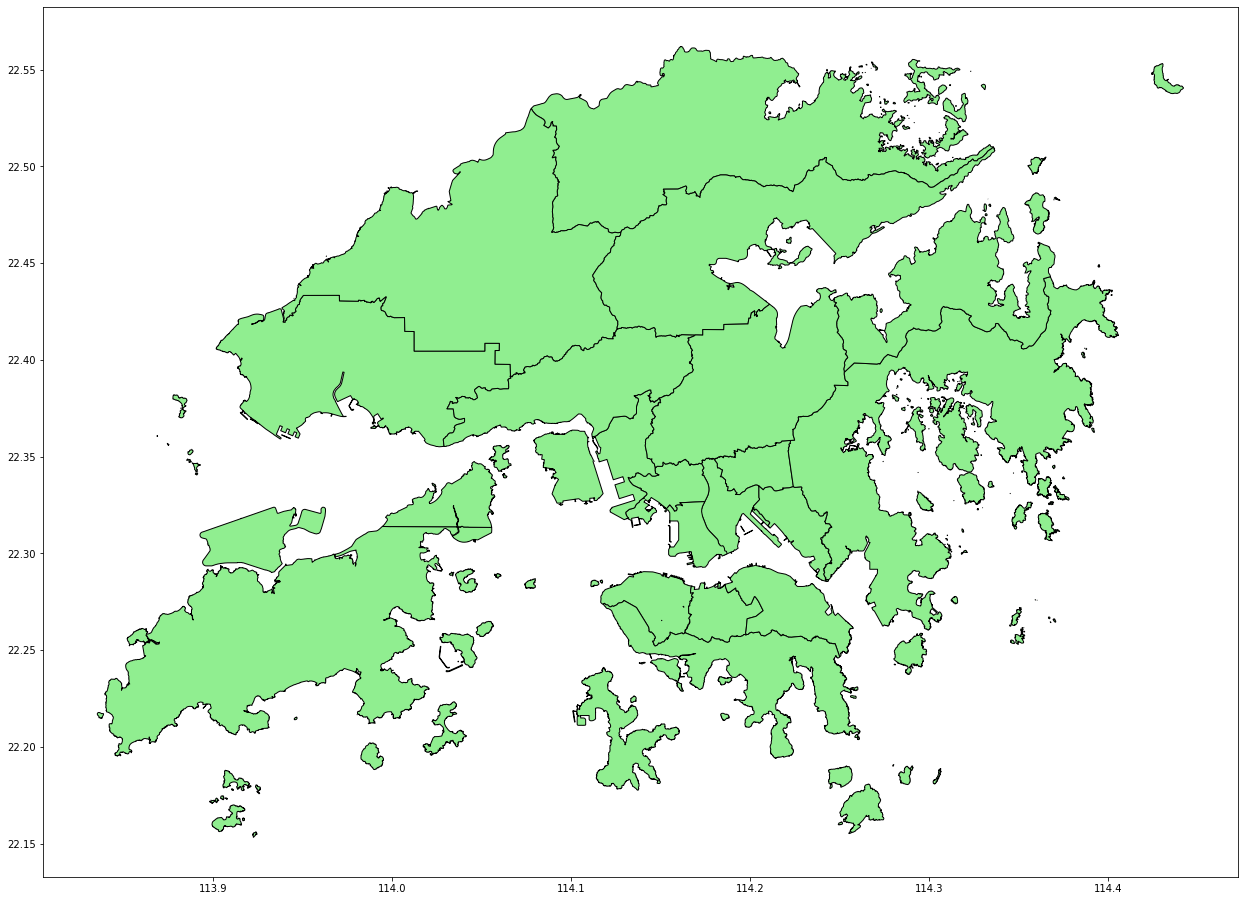

In [ ]:
hong_kong = gpd.read_file('/content/drive/MyDrive/Hong_Kong_18_Districts (1).geojson')
hong_kong.plot(color='lightgreen', edgecolor='black')

In [ ]:
hong_kong.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
hong_kong

,OBJECTID,ID,CNAME,CNAME_S,ENAME,SHAPE_Length,SHAPE_Area,geometry
0,1,1.0,黃大仙區,黄大仙区,WONG TAI SIN,0.156228,0.000816,"MULTIPOLYGON (((114.17942 22.34905, 114.17946 ..."
1,2,6.0,九龍城區,九龙城区,KOWLOON CITY,0.273668,0.000884,"MULTIPOLYGON (((114.17700 22.34904, 114.17702 ..."
2,3,7.0,觀塘區,观塘区,KWUN TONG,0.220475,0.000987,"MULTIPOLYGON (((114.24371 22.28620, 114.24370 ..."
3,4,8.0,西貢區,西贡区,SAI KUNG,3.154700,0.011963,"MULTIPOLYGON (((114.22112 22.35318, 114.22114 ..."
4,5,11.0,北區,北区,NORTH,1.671697,0.012070,"MULTIPOLYGON (((114.33576 22.51003, 114.33576 ..."
5,6,13.0,中西區,中西区,CENTRAL & WESTERN,0.231894,0.001091,"MULTIPOLYGON (((114.14562 22.29045, 114.14990 ..."
6,7,14.0,灣仔區,湾仔区,WAN CHAI,0.168909,0.000867,"MULTIPOLYGON (((114.20012 22.27387, 114.20047 ..."
7,8,15.0,東區,东区,EASTERN,0.313439,0.001631,"MULTIPOLYGON (((114.24738 22.25339, 114.24733 ..."
8,9,17.0,屯門區,屯门区,TUEN MUN,0.859430,0.007402,"MULTIPOLYGON (((113.93745 22.42638, 113.93765 ..."
9,10,18.0,元朗區,元朗区,YUEN LONG,0.790774,0.012297,"MULTIPOLYGON (((113.93832 22.42696, 113.93843 ..."


In [ ]:
gdf1 = gpd.read_file('/content/drive/MyDrive/CHP_CAP599A_QUARANTINE_V1_Feb.geojson')
gdf1

,id,OBJECTID,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry
0,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,325,Yuen Long,元朗區,"Tsz Ping House, Tin Tsz Estate",天慈村慈平樓,2020-02-09,818785.0,834821.0,2020-02-10,POINT (818785.000 834821.000)
1,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,326,Yuen Long,元朗區,"Wing Fu House, Tin Fu Court",天富苑榮富閣,2020-02-09,817878.0,836141.0,2020-02-10,POINT (817878.000 836141.000)
2,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,327,North,北區,"Block A, Fanling Centre",粉嶺中心A座,2020-02-10,832736.0,838934.0,2020-02-10,POINT (832736.000 838934.000)
3,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,328,Sha Tin,沙田區,"Fontana Heights, Belair Garden",富豪花園富儷閣,2020-02-10,838574.0,827257.0,2020-02-10,POINT (838574.000 827257.000)
4,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,329,Yau Tsim Mong,油尖旺區,69 Bute Street,弼街69號,2020-02-10,835629.0,820386.0,2020-02-10,POINT (835629.000 820386.000)
...,...,...,...,...,...,...,...,...,...,...,...
481,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,319,Southern,南區,"Lei Tim House, Ap Lei Chau Estate",鴨脷洲邨利添樓,2020-02-09,833609.0,811773.0,2020-02-10,POINT (833609.000 811773.000)
482,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,320,Tai Po,大埔區,"Hing Wo House, Po Nga Court, Tai Wo Estate",太和邨寶雅苑興和閣,2020-02-09,834387.0,834588.0,2020-02-10,POINT (834387.000 834588.000)
483,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,322,Yau Tsim Mong,油尖旺區,"Hung Hom Hall, The Hong Kong Polytechnic Unive...",香港理工大學(紅磡)學生宿舍,2020-02-09,837150.0,818329.0,2020-02-10,POINT (837150.000 818329.000)
484,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,323,Yau Tsim Mong,油尖旺區,"Block 1, Victoria Towers",港景峰1座,2020-02-09,835383.0,818119.0,2020-02-10,POINT (835383.000 818119.000)


In [ ]:
gdf1.to_crs("EPSG:4326",inplace=True)

In [ ]:
gdf2 = gdf.append(gdf1)

In [ ]:
gdf2

,id,OBJECTID,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry
0,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62718,North,北區,NO.3 KA FU CLOSE,嘉富坊3號,2020-03-21,830684.0,840878.0,2020-03-14,POINT (114.12260 22.50753)
1,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62720,North,北區,"BLOCK 1, VIENNA GARDEN",維也納花園1座,2020-03-21,831478.0,839589.0,2020-03-14,POINT (114.13032 22.49589)
2,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62721,North,北區,LOK FUNG BUILDING,樂豐樓,2020-03-21,832770.0,839959.0,2020-03-14,POINT (114.14288 22.49924)
3,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62722,North,北區,NO.10 LUNG SUM AVENUE,龍琛路10號,2020-03-21,831427.0,840466.0,2020-03-14,POINT (114.12983 22.50381)
4,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62723,North,北區,LO WU STATION ROAD,羅湖道,2020-03-21,830194.0,842843.0,2020-03-14,POINT (114.11783 22.52528)
...,...,...,...,...,...,...,...,...,...,...,...
481,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,319,Southern,南區,"Lei Tim House, Ap Lei Chau Estate",鴨脷洲邨利添樓,2020-02-09,833609.0,811773.0,2020-02-10,POINT (114.15108 22.24471)
482,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,320,Tai Po,大埔區,"Hing Wo House, Po Nga Court, Tai Wo Estate",太和邨寶雅苑興和閣,2020-02-09,834387.0,834588.0,2020-02-10,POINT (114.15860 22.45074)
483,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,322,Yau Tsim Mong,油尖旺區,"Hung Hom Hall, The Hong Kong Polytechnic Unive...",香港理工大學(紅磡)學生宿舍,2020-02-09,837150.0,818329.0,2020-02-10,POINT (114.18543 22.30391)
484,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,323,Yau Tsim Mong,油尖旺區,"Block 1, Victoria Towers",港景峰1座,2020-02-09,835383.0,818119.0,2020-02-10,POINT (114.16829 22.30202)


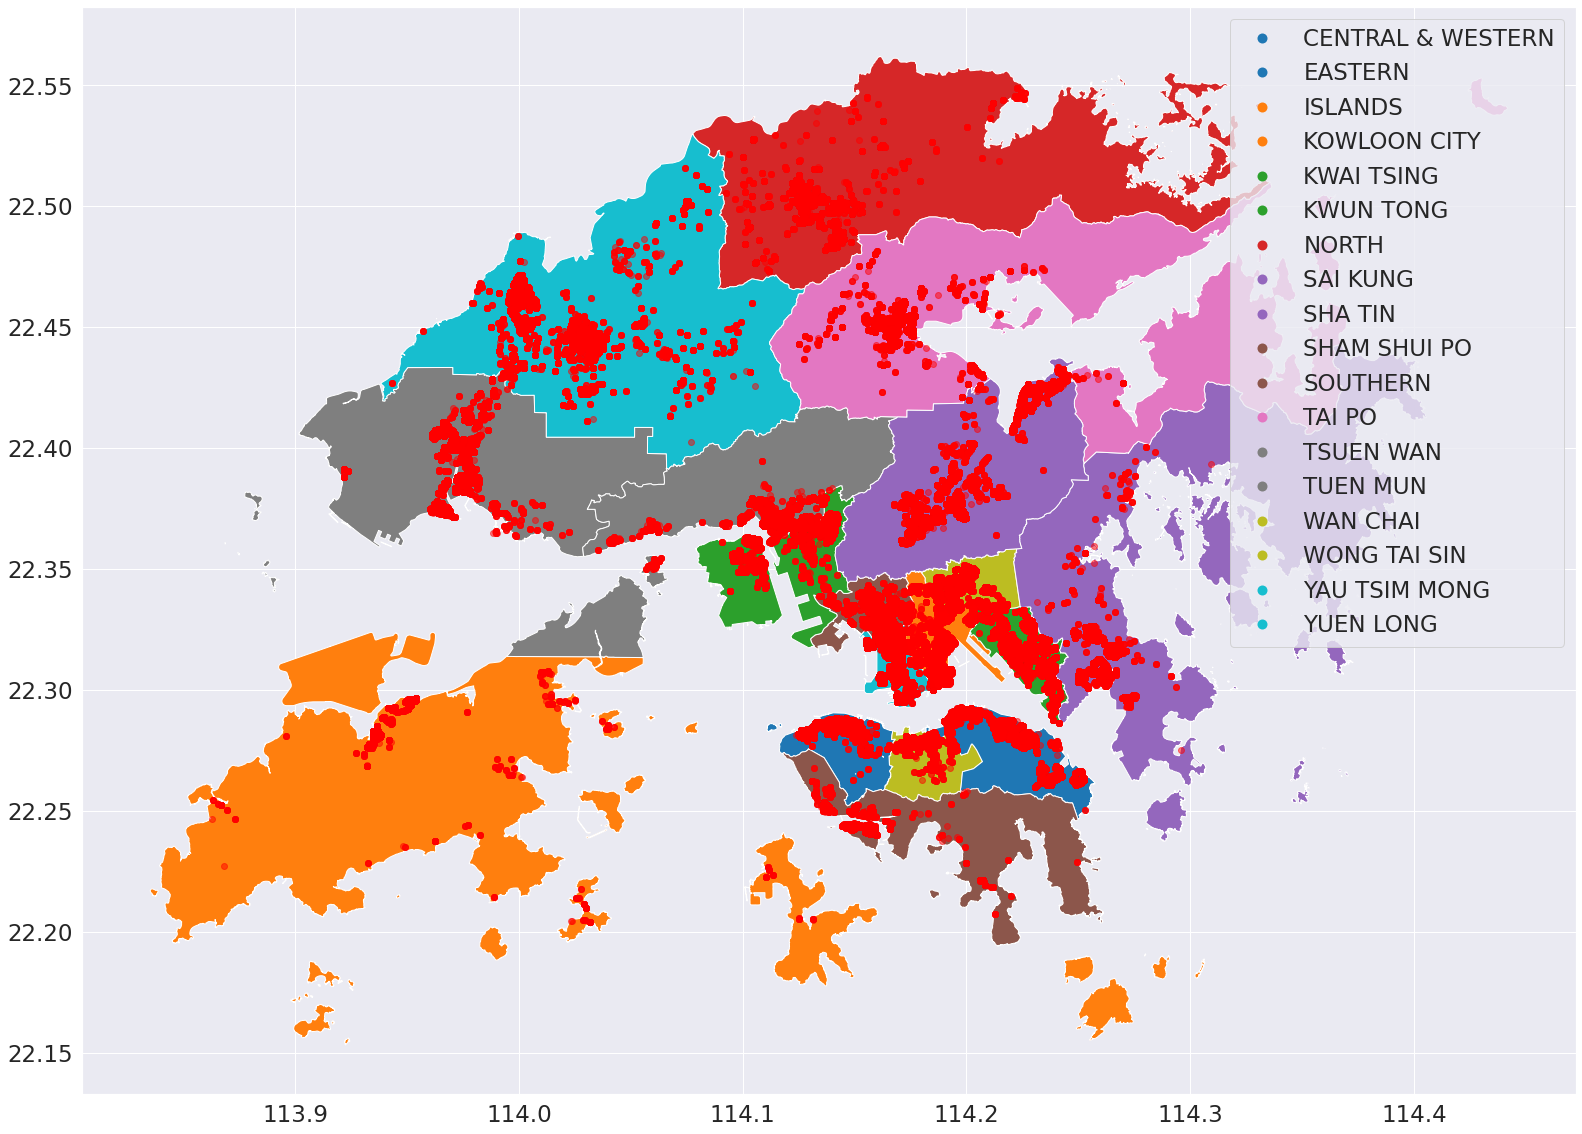

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, color='red', alpha = 0.5)

In [ ]:
gdf2.to_crs('EPSG:4326')

,id,OBJECTID,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry
0,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62718,North,北區,NO.3 KA FU CLOSE,嘉富坊3號,2020-03-21,830684.0,840878.0,2020-03-14,POINT (114.12260 22.50753)
1,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62720,North,北區,"BLOCK 1, VIENNA GARDEN",維也納花園1座,2020-03-21,831478.0,839589.0,2020-03-14,POINT (114.13032 22.49589)
2,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62721,North,北區,LOK FUNG BUILDING,樂豐樓,2020-03-21,832770.0,839959.0,2020-03-14,POINT (114.14288 22.49924)
3,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62722,North,北區,NO.10 LUNG SUM AVENUE,龍琛路10號,2020-03-21,831427.0,840466.0,2020-03-14,POINT (114.12983 22.50381)
4,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62723,North,北區,LO WU STATION ROAD,羅湖道,2020-03-21,830194.0,842843.0,2020-03-14,POINT (114.11783 22.52528)
...,...,...,...,...,...,...,...,...,...,...,...
481,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,319,Southern,南區,"Lei Tim House, Ap Lei Chau Estate",鴨脷洲邨利添樓,2020-02-09,833609.0,811773.0,2020-02-10,POINT (114.15108 22.24471)
482,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,320,Tai Po,大埔區,"Hing Wo House, Po Nga Court, Tai Wo Estate",太和邨寶雅苑興和閣,2020-02-09,834387.0,834588.0,2020-02-10,POINT (114.15860 22.45074)
483,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,322,Yau Tsim Mong,油尖旺區,"Hung Hom Hall, The Hong Kong Polytechnic Unive...",香港理工大學(紅磡)學生宿舍,2020-02-09,837150.0,818329.0,2020-02-10,POINT (114.18543 22.30391)
484,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,323,Yau Tsim Mong,油尖旺區,"Block 1, Victoria Towers",港景峰1座,2020-02-09,835383.0,818119.0,2020-02-10,POINT (114.16829 22.30202)


In [ ]:
gdf2 = gdf2.reset_index(drop=True)

In [ ]:
X = pd.DataFrame(gdf2['geometry'].x,columns=['x1'])

In [ ]:
X

,x1
0,114.122603
1,114.130324
2,114.142879
3,114.129826
4,114.117833
...,...
92499,114.151080
92500,114.158600
92501,114.185434
92502,114.168286


In [ ]:
X['x2'] = gdf2['geometry'].y


In [ ]:
X

,x1,x2
0,114.122603,22.507532
1,114.130324,22.495894
2,114.142879,22.499239
3,114.129826,22.503814
4,114.117833,22.525275
...,...,...
92499,114.151080,22.244706
92500,114.158600,22.450739
92501,114.185434,22.303912
92502,114.168286,22.302016


In [ ]:
X.dropna(inplace=True)

In [ ]:
X

,x1,x2
0,114.122603,22.507532
1,114.130324,22.495894
2,114.142879,22.499239
3,114.129826,22.503814
4,114.117833,22.525275
...,...,...
92499,114.151080,22.244706
92500,114.158600,22.450739
92501,114.185434,22.303912
92502,114.168286,22.302016


[2 2 2 ... 3 3 0]


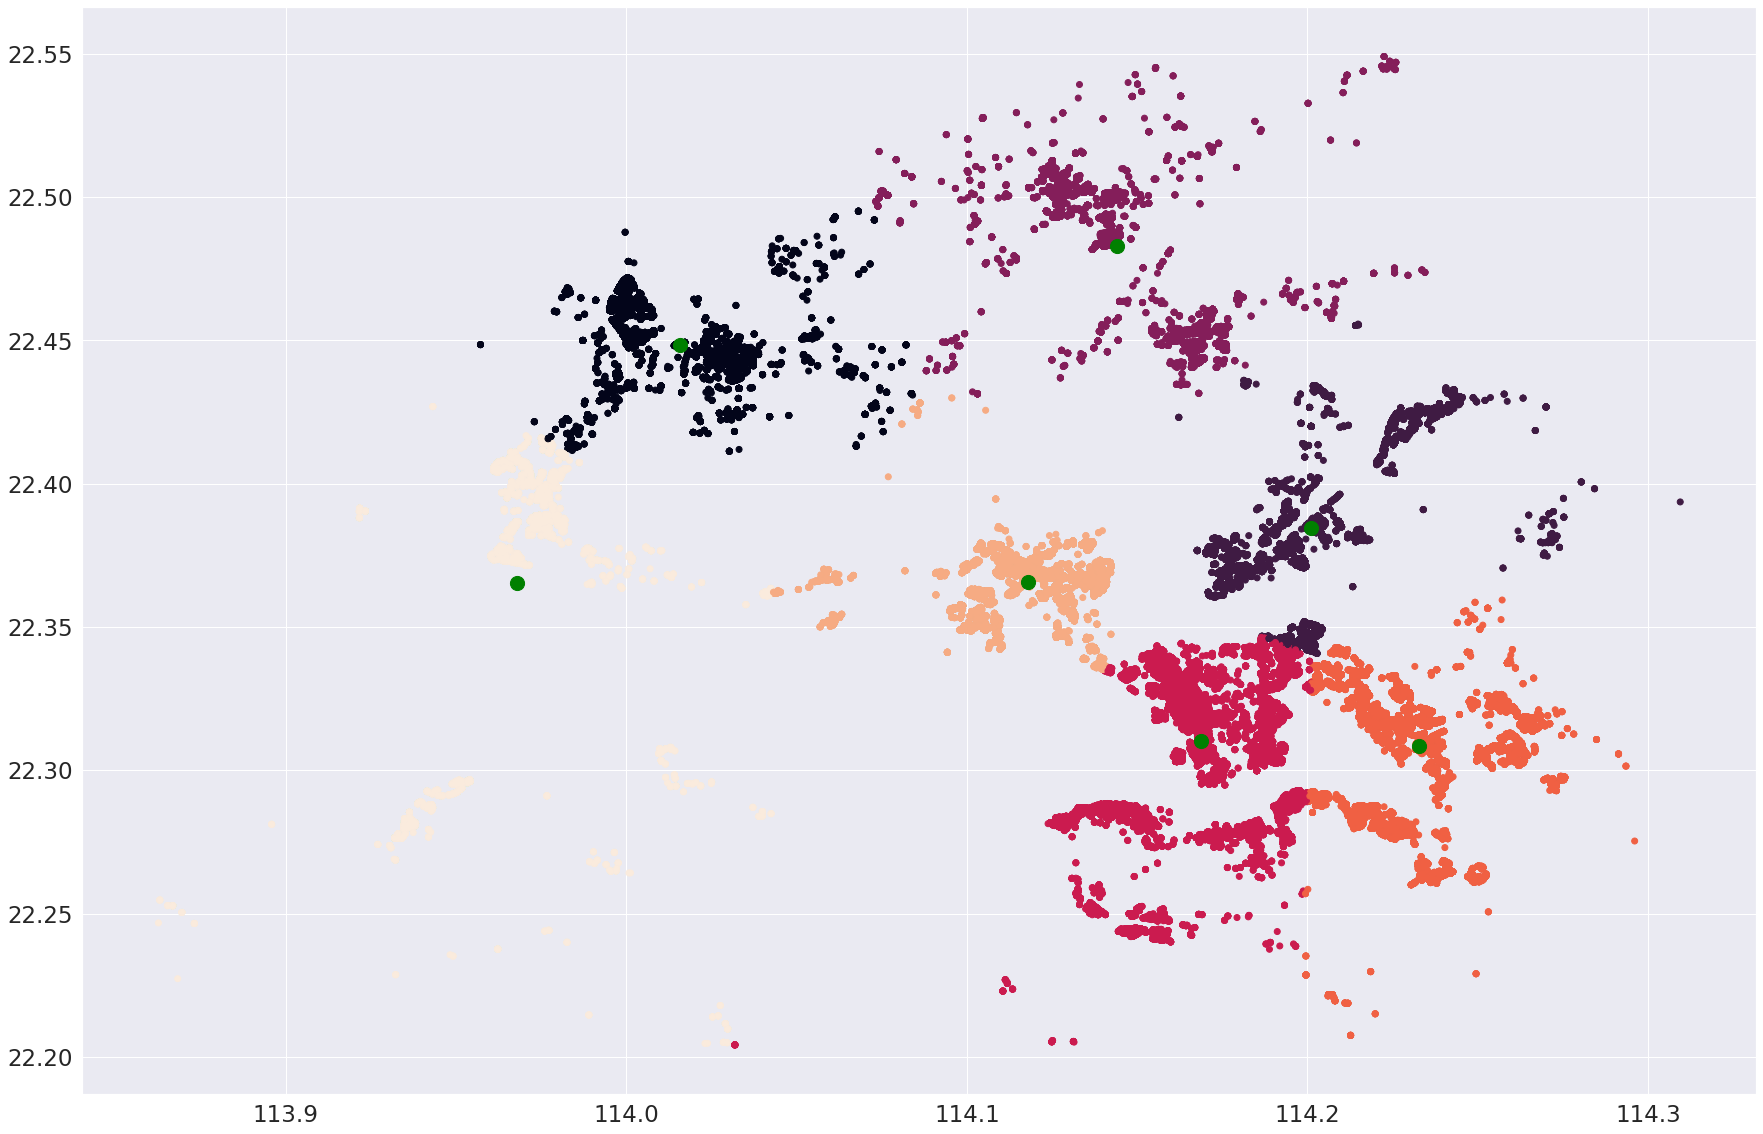

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X['x1'], X['x2'], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200);

In [ ]:
centers

array([[114.01564381,  22.44849671],
       [114.20097303,  22.3844469 ],
       [114.14419332,  22.48303646],
       [114.16872973,  22.31024718],
       [114.2326725 ,  22.30847535],
       [114.11802116,  22.36571744],
       [113.9679137 ,  22.36541379]])

In [ ]:
gdf2.dropna(inplace=True)

In [ ]:
gdf2['center'] = y_kmeans

In [ ]:
gdf2

,id,OBJECTID,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry,center
0,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62718,North,北區,NO.3 KA FU CLOSE,嘉富坊3號,2020-03-21,830684.0,840878.0,2020-03-14,POINT (114.12260 22.50753),2
1,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62720,North,北區,"BLOCK 1, VIENNA GARDEN",維也納花園1座,2020-03-21,831478.0,839589.0,2020-03-14,POINT (114.13032 22.49589),2
2,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62721,North,北區,LOK FUNG BUILDING,樂豐樓,2020-03-21,832770.0,839959.0,2020-03-14,POINT (114.14288 22.49924),2
3,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62722,North,北區,NO.10 LUNG SUM AVENUE,龍琛路10號,2020-03-21,831427.0,840466.0,2020-03-14,POINT (114.12983 22.50381),2
4,CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...,62723,North,北區,LO WU STATION ROAD,羅湖道,2020-03-21,830194.0,842843.0,2020-03-14,POINT (114.11783 22.52528),2
...,...,...,...,...,...,...,...,...,...,...,...,...
92499,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,319,Southern,南區,"Lei Tim House, Ap Lei Chau Estate",鴨脷洲邨利添樓,2020-02-09,833609.0,811773.0,2020-02-10,POINT (114.15108 22.24471),3
92500,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,320,Tai Po,大埔區,"Hing Wo House, Po Nga Court, Tai Wo Estate",太和邨寶雅苑興和閣,2020-02-09,834387.0,834588.0,2020-02-10,POINT (114.15860 22.45074),2
92501,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,322,Yau Tsim Mong,油尖旺區,"Hung Hom Hall, The Hong Kong Polytechnic Unive...",香港理工大學(紅磡)學生宿舍,2020-02-09,837150.0,818329.0,2020-02-10,POINT (114.18543 22.30391),3
92502,CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...,323,Yau Tsim Mong,油尖旺區,"Block 1, Victoria Towers",港景峰1座,2020-02-09,835383.0,818119.0,2020-02-10,POINT (114.16829 22.30202),3


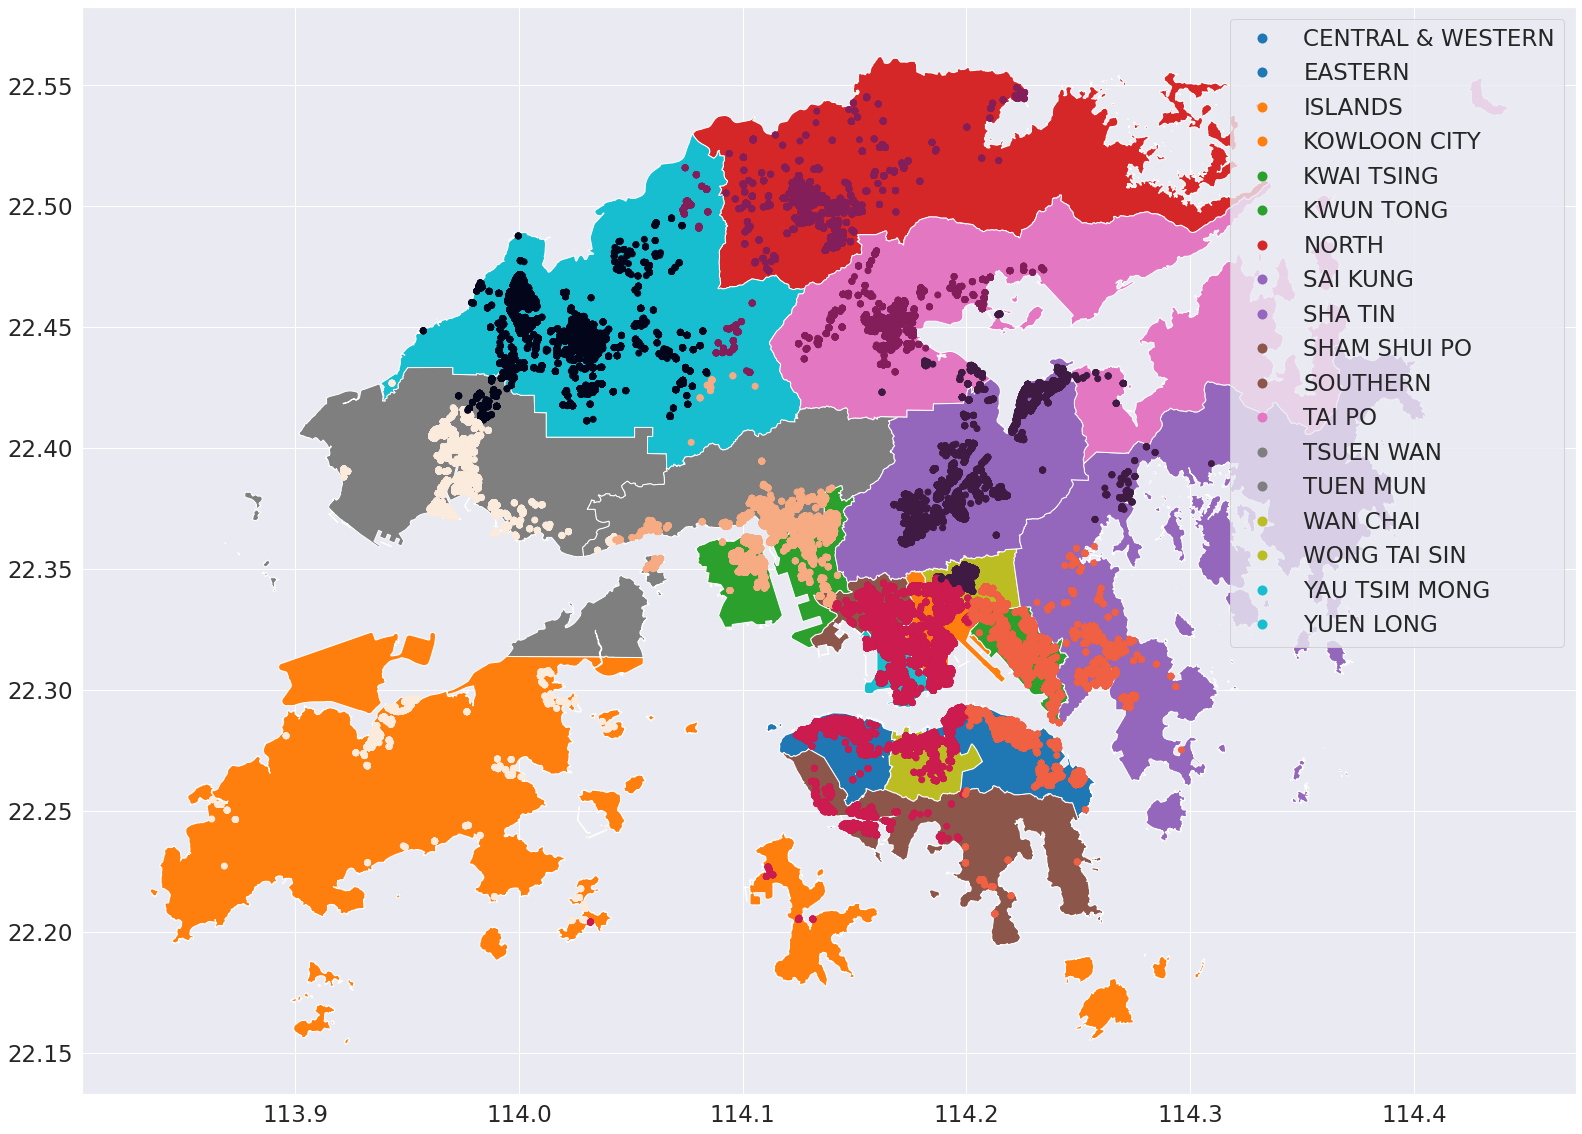

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, column='center')

[6 6 6 ... 0 0 1]


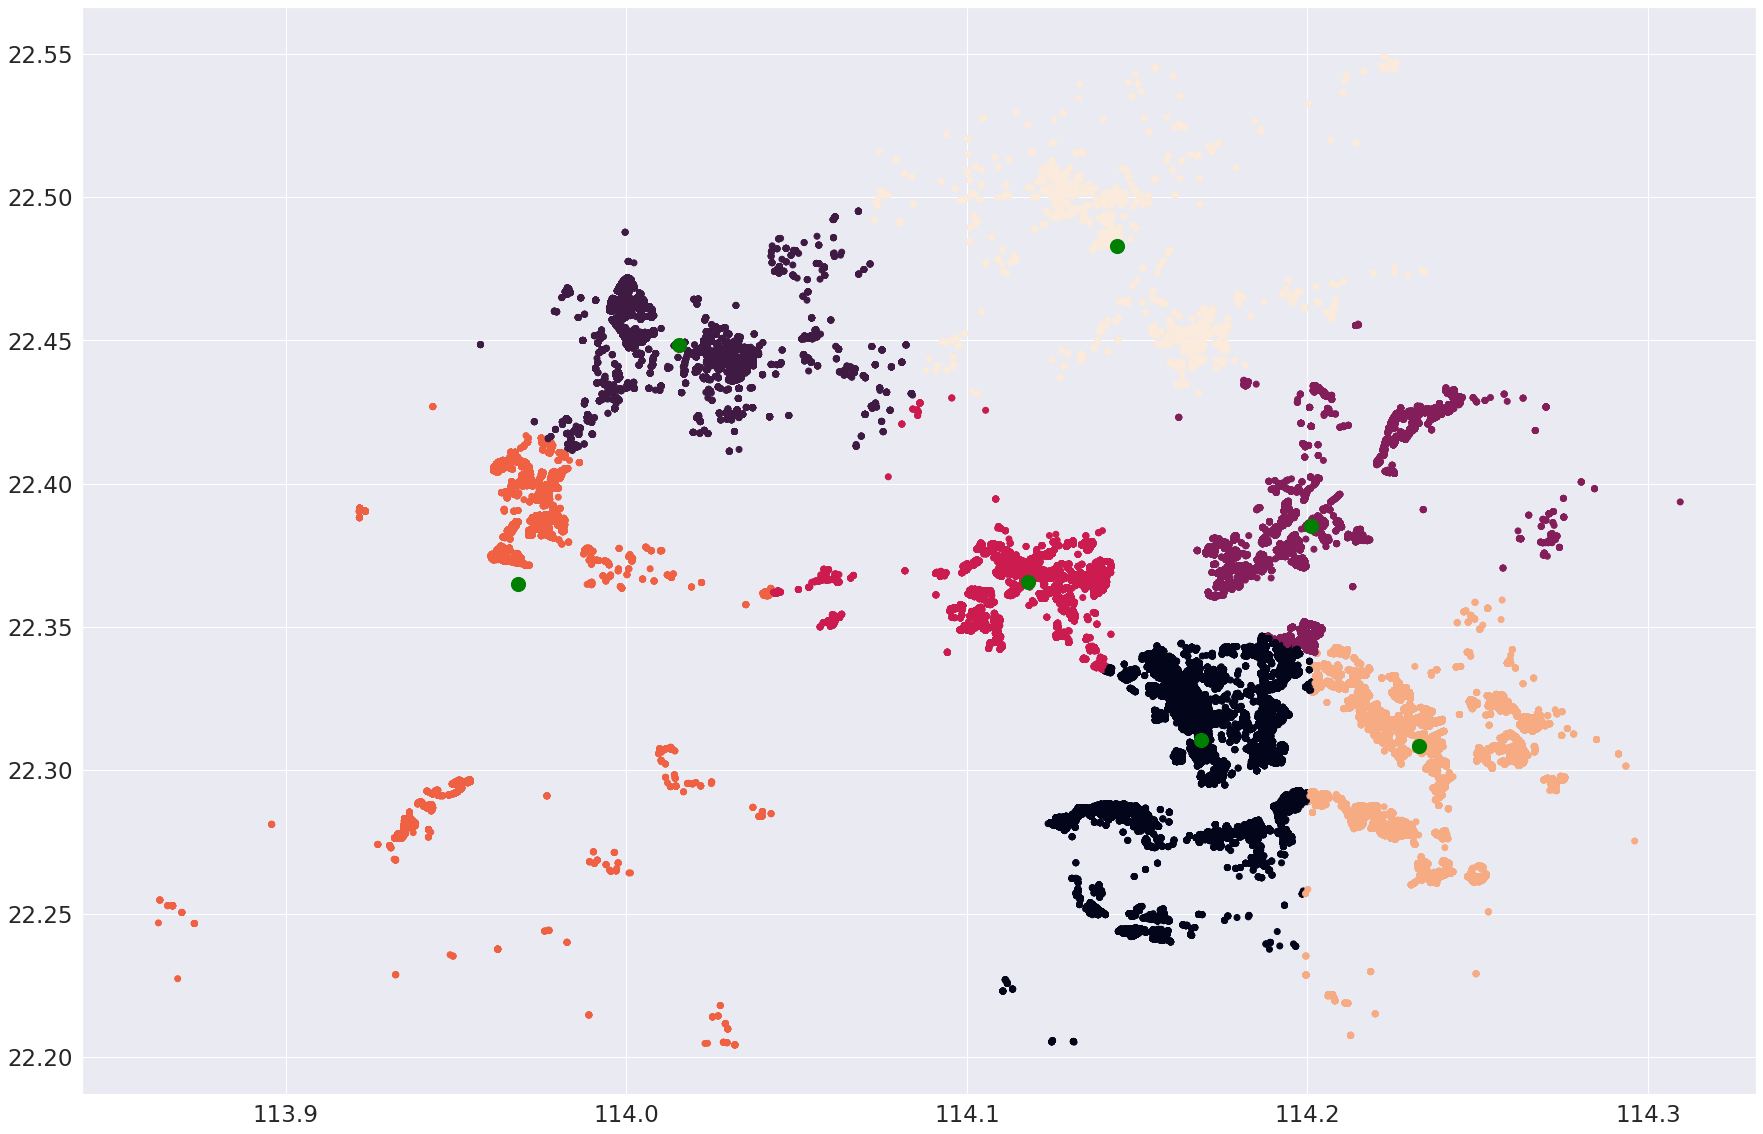

In [ ]:
# K = 7
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X['x1'], X['x2'], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200);

In [ ]:
gdf2['center'] = y_kmeans

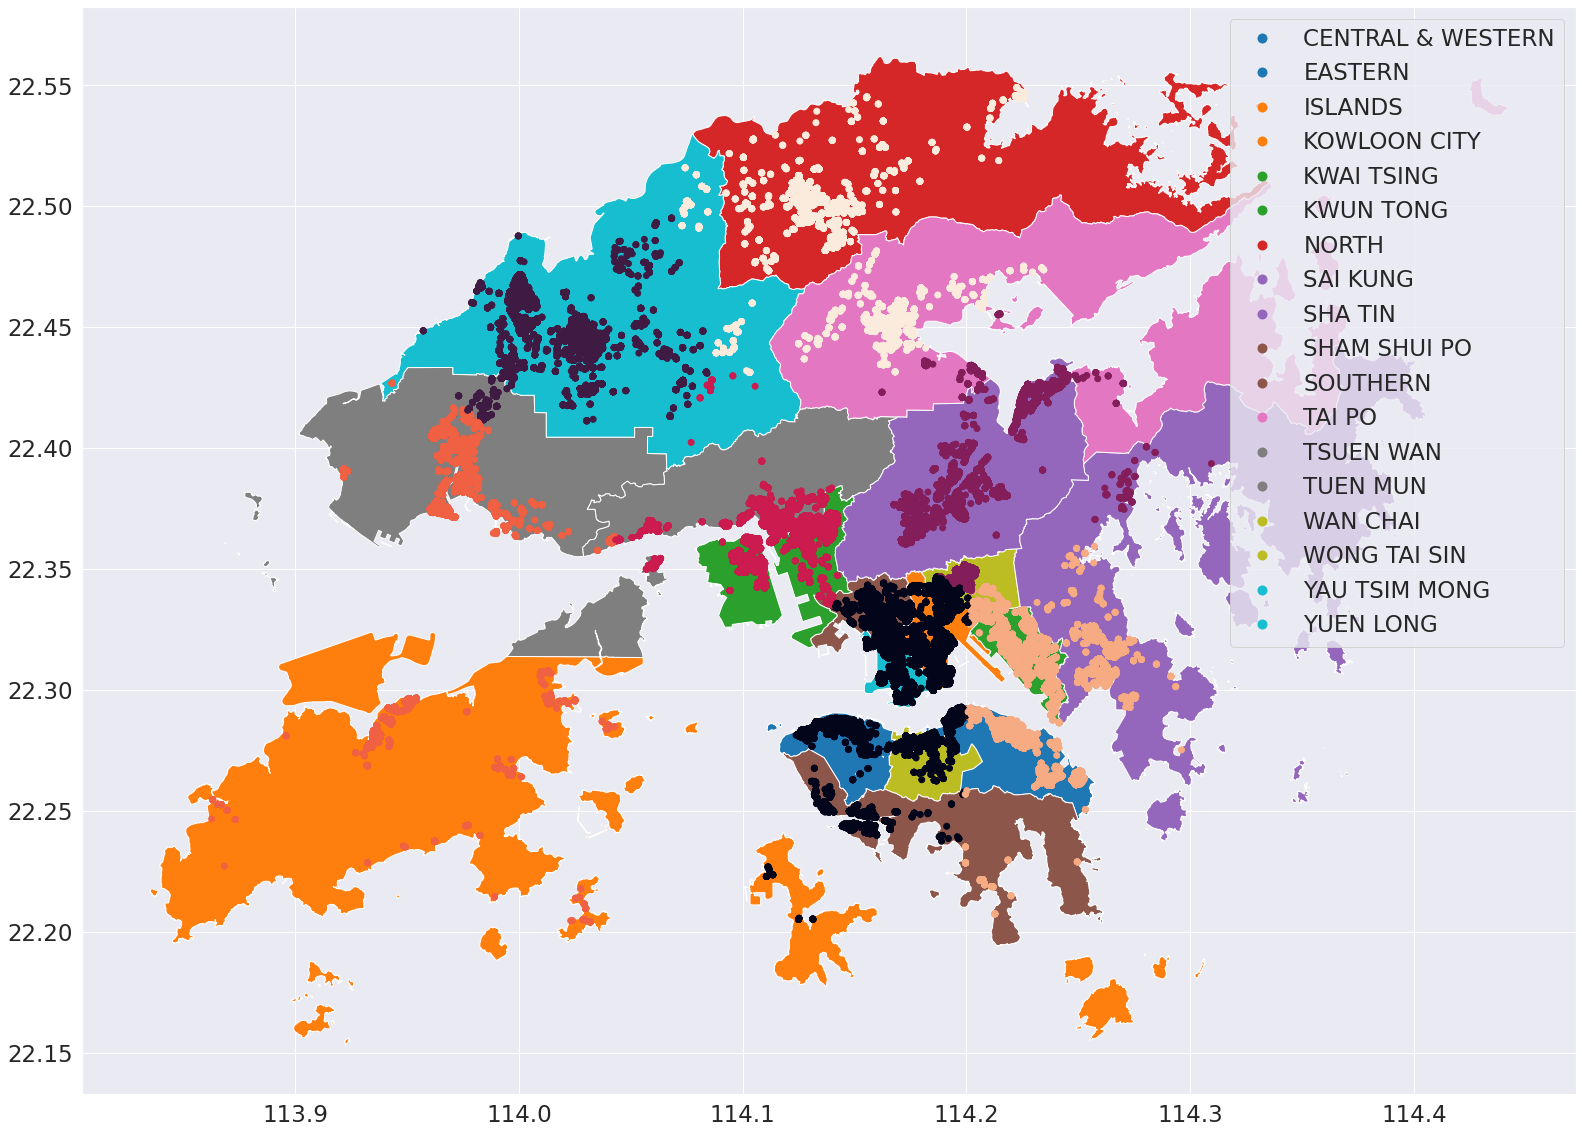

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, column='center')